In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import scipy
import tiffcapture as tc
import time
import torch
import torchvision
from tqdm.notebook import tqdm

In [3]:
# opencv colors

BLUE = (255, 0, 0)
GREEN = (0, 255, 0)
RED = (0, 0, 255)

## Rescale and preprocess some movies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import skvideo.io
import tifffile

In [13]:
file = "../Data/Videos/20140829 3.tif"
arr = tifffile.imread(file)
print(arr.shape, arr.dtype)
#arr.min(), np.median(arr), arr.max()

(914, 1024, 1024) uint16


In [14]:
a, b = np.histogram(arr, bins=(range(300, 2500, 10)))

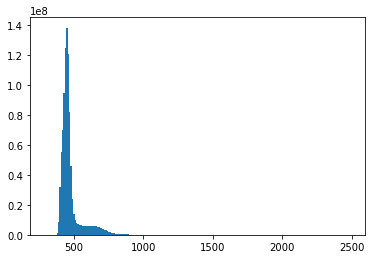

In [15]:
plt.bar(b[:-1], a, width=10)
plt.show()

In [16]:
(arr < 1000).sum() / arr.size

0.9989108820191097

In [17]:
#change mini, maxi depending on the range of values on the histogram
mini = 300 
maxi = 1000

np.clip(arr, mini, maxi, arr)


scaled = ((arr - mini) / (maxi - mini) * 255).astype(np.uint8)


tifffile.imwrite(file.split(".tif")[0] + "(smart_rescaled).tif", scaled)

## See movies and save in .avi


In [10]:
cv2.VideoWriter_fourcc(*"DIVX")

1482049860

In [27]:
#read the video

video = Image.open("../Data/Videos/20140829 3(smart_rescaled).tif")

fps = 30
frame = np.array(video)

for i in range(video.n_frames):
    video.seek(i)
    frame = np.array(video)
    
    cv2.imshow('Frame', frame)
    key = cv2.waitKey(int(1/fps * 1000)) & 0xFF

    if key == ord('q'):
        break
        
cv2.destroyAllWindows()
video.release()

AttributeError: release

In [28]:
#convert in avi

fps = 30
frame = np.array(video)
#frame = cv2.resize(frame, (1280,720))
height , width =  frame.shape
videoavi = cv2.VideoWriter('../Data/Videos/20140829 3.avi',cv2.VideoWriter_fourcc(*"DIVX"), fps,(width,height), 0)

for i in range(video.n_frames):
    video.seek(i)
    frame = np.array(video)
    videoavi.write(frame)
        
cv2.destroyAllWindows()
videoavi.release()